# Got Wine?

<b>Team Viper: Asiha Braxton-Garvin, Alex Schanne, Ida Kalley, Jessie Lynch, Kah Man Ngui</b>

For our first data science project, we decided to analyze winery reviews on Yelp to determine what attributes influence positive Yelp reviews within this business category, focusing on location and price. In addition to narrowing our project scope in terms of attributes, we decided to focus exclusively on wineries within the US. This helps to keep some of the 'unmeasured' or intangible variables, like cultural expectation and economic continuity, more consistent because as we will go into further during our concessions and discussion, there are many parts of these data that may lead to inaccurate representation of trends. 
<p>
We acknowledge these shortcomings and present to you our best effort based on the provided data from the Yelp API and our existing skill set. We chose the Yelp API because it was free and accessible and met the needs of this project. We have no relationship with it or any of the wineries mentioned in the following data, therefore we have no conflict of interests to report. 
<p>
We hope that the following discussion will be fun and useful for anyone wondering about winery experience in the US. And look forward to continuing to build on our skills used in the project to improve our analysis going forward. Please enjoy!

In [1]:
#Importing libraries and dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib as plt
import gmaps

# Import API key
from config import api_key
from config import g_key

#configuring gmaps
gmaps.configure(api_key = g_key)

In [2]:
#configuring the Yelp API
headers = {'Authorization': 'Bearer %s' % api_key}

## Gathering and Organizing Data

In [5]:
#creating a list of states to loop through
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
         ' Idaho','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
          'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico'',New York','North Carolina',
          'North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
          'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

#creating empty lists to store the data from the API
s_name = []
s_city =[]
s_state = []
s_category =[]
s_p = []
s_rating=[]
s_review = []
lat = []
lng = []
state= []
j=0

#URL for Yelp's API
url='https://api.yelp.com/v3/businesses/search'

#looping the API and collecting necessary data
for s in states:
    
    param = {'location':s,'term':'wineries','price':'1,2,3,4'}
    responses=requests.get(url, params=param, headers=headers).json()
    j=0

    for bus in responses['businesses']:
        
        try:
            s_name.append(responses['businesses'][j]['name'])
            s_city.append(responses['businesses'][j]['location']['city'])
            s_state.append(responses['businesses'][j]['location']['state'])
            s_category.append(responses['businesses'][j]['categories'])
            s_rating.append(responses['businesses'][j]['rating'])
            s_review.append(responses['businesses'][j]['review_count'])
            s_p.append(responses['businesses'][j]['price'])
            lat.append(responses['businesses'][j]['coordinates']['latitude'])
            lng.append(responses['businesses'][j]['coordinates']['longitude'])
            state.append(s)
        except:
            lat.append("")
            lng.append("")
            s_p.append("")
        j+=1
            

    
#creating and printing out the dataframe
df = pd.DataFrame({"Business Name":s_name,"City":s_city, "State":s_state, "State Searched":state,"Category":s_category,"Review Count":s_review,"Rating":s_rating,"Lat":lat,"Lng":lng, "Price":s_p})

df

,Business Name,City,State,State Searched,Category,Review Count,Rating,Lat,Lng,Price
0,Corbin Farms Winery,Calera,AL,Alabama,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$
1,Cat-n-Bird Winery,Chelsea,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$
2,Ozan Vineyard & Winery,Calera,AL,Alabama,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$
3,Morgan Creek Vineyards,Harpersville,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$
4,Lewis Lakes Vineyards,Columbiana,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,33.201971,-86.613531,$$
...,...,...,...,...,...,...,...,...,...,...
549,Chiselled Grape Winery,Cedarburg,WI,Wisconsin,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$
550,Crush Wine Bar,Muskego,WI,Wisconsin,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$
551,Total Wine & More,Brookfield,WI,Wisconsin,"[{'alias': 'tobaccoshops', 'title': 'Tobacco S...",35,3.5,43.037835,-88.128296,$$
552,Fox & Fork,Rochester,WI,Wisconsin,"[{'alias': 'homedecor', 'title': 'Home Decor'}...",2,4.5,42.740948,-88.225754,$$$


In [6]:
#Creating a separate column that converts the price symbols to categorical ranges (0 to 4)
df['Price Numerical'] =""
for index, row in df.iterrows():
    if df.loc[index,'Price'] == "$":
        df.loc[index,'Price Numerical'] = 1
    elif df.loc[index,'Price'] == "$$":
        df.loc[index,'Price Numerical'] = 2
    elif df.loc[index,'Price'] == "$$$":
        df.loc[index,'Price Numerical'] = 3
    elif df.loc[index,'Price'] == "$$$$":
        df.loc[index,'Price Numerical'] = 4
df

,Business Name,City,State,State Searched,Category,Review Count,Rating,Lat,Lng,Price,Price Numerical
0,Corbin Farms Winery,Calera,AL,Alabama,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$,2
1,Cat-n-Bird Winery,Chelsea,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$,2
2,Ozan Vineyard & Winery,Calera,AL,Alabama,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$,2
3,Morgan Creek Vineyards,Harpersville,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$,2
4,Lewis Lakes Vineyards,Columbiana,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,33.201971,-86.613531,$$,2
...,...,...,...,...,...,...,...,...,...,...,...
549,Chiselled Grape Winery,Cedarburg,WI,Wisconsin,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$,2
550,Crush Wine Bar,Muskego,WI,Wisconsin,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$,2
551,Total Wine & More,Brookfield,WI,Wisconsin,"[{'alias': 'tobaccoshops', 'title': 'Tobacco S...",35,3.5,43.037835,-88.128296,$$,2
552,Fox & Fork,Rochester,WI,Wisconsin,"[{'alias': 'homedecor', 'title': 'Home Decor'}...",2,4.5,42.740948,-88.225754,$$$,3


In [7]:
#grouping the states into region for later regional analysis
north = ['IL', 'IN', 'MI', 'MN', 'OH', 'WI']
northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
south = ['AR', 'LA', 'OK', 'TX', 'AL', 'FL', 'GA', 'MS', 'SC']
midsouth = ['DE', 'DC', 'KY', 'MD', 'NC', 'TN', 'VA', 'WV']
midwest = ['IA', 'KS', 'MO', 'NE', 'ND', 'SD']
west = ['CA', 'HI', 'NV', 'AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY']
northwest = ['OR', 'WA', 'AK']
df['Region']=""

#looping through the dataframe to assign their regions in a new column
for index, r in df.iterrows():
    if r['State'] in north:
        df.loc[index,'Region'] = "N"
    elif r['State'] in northeast:
        df.loc[index,'Region'] = "NE"
    elif r['State'] in south:
        df.loc[index,'Region'] = "S"
    elif r['State'] in midsouth:
        df.loc[index,'Region'] = "MS"
    elif r['State'] in midwest:
        df.loc[index,'Region'] = "MW"
    elif r['State'] in west:
        df.loc[index,'Region'] = "W"
    else:
        df.loc[index,'Region'] = "NE"
    
    
df


,Business Name,City,State,State Searched,Category,Review Count,Rating,Lat,Lng,Price,Price Numerical,Region
0,Corbin Farms Winery,Calera,AL,Alabama,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$,2,S
1,Cat-n-Bird Winery,Chelsea,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$,2,S
2,Ozan Vineyard & Winery,Calera,AL,Alabama,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$,2,S
3,Morgan Creek Vineyards,Harpersville,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$,2,S
4,Lewis Lakes Vineyards,Columbiana,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,33.201971,-86.613531,$$,2,S
...,...,...,...,...,...,...,...,...,...,...,...,...
549,Chiselled Grape Winery,Cedarburg,WI,Wisconsin,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$,2,N
550,Crush Wine Bar,Muskego,WI,Wisconsin,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$,2,N
551,Total Wine & More,Brookfield,WI,Wisconsin,"[{'alias': 'tobaccoshops', 'title': 'Tobacco S...",35,3.5,43.037835,-88.128296,$$,2,N
552,Fox & Fork,Rochester,WI,Wisconsin,"[{'alias': 'homedecor', 'title': 'Home Decor'}...",2,4.5,42.740948,-88.225754,$$$,3,N


In [8]:
#saving the dataframe to a csv to reference and cut down on calling the API
df.to_csv('df.csv')

## Bar Graphs of Attributes

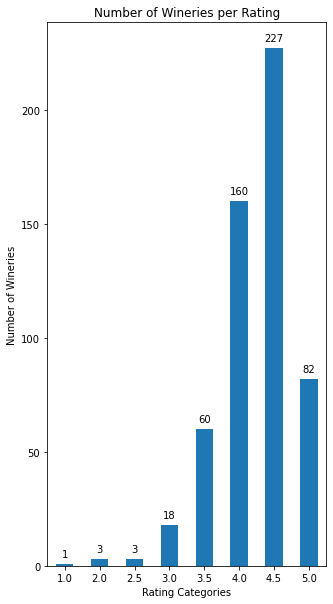

In [10]:
#creating a bar plot of the number of wineries to which each rating was given
rate = df['Rating'].value_counts().sort_index()
plt = rate.plot( kind='bar', rot=0,figsize=(5,10))

#setting titles and axes labels
plt.set_title("Number of Wineries per Rating")
plt.set_xlabel("Rating Categories")
plt.set_ylabel("Number of Wineries")

#annotating values on the graph
for p in plt.patches:
    plt.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Saving figure
plt.figure.savefig("Images/WineriesPerRating.png")

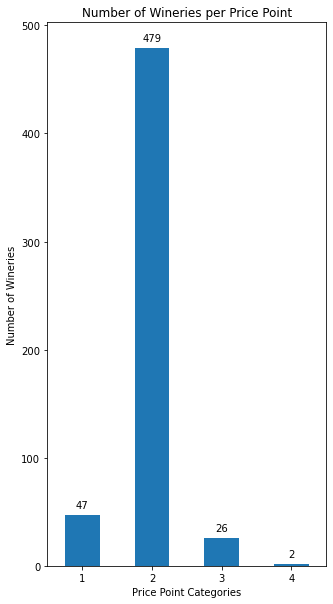

In [11]:
#creating a bar chart of the number of wineries per price category
price = df['Price Numerical'].value_counts().sort_index()
plt = price.plot(kind='bar',rot=0,figsize=(5,10))

#setting titles and axes labels
plt.set_title("Number of Wineries per Price Point")
plt.set_xlabel("Price Point Categories")
plt.set_ylabel("Number of Wineries")

#annotating values on the graph
for p in plt.patches:
    plt.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Saving figure
plt.figure.savefig("Images/WineriesPerPricePoint.png")

## Bar Graphs By Regions and States

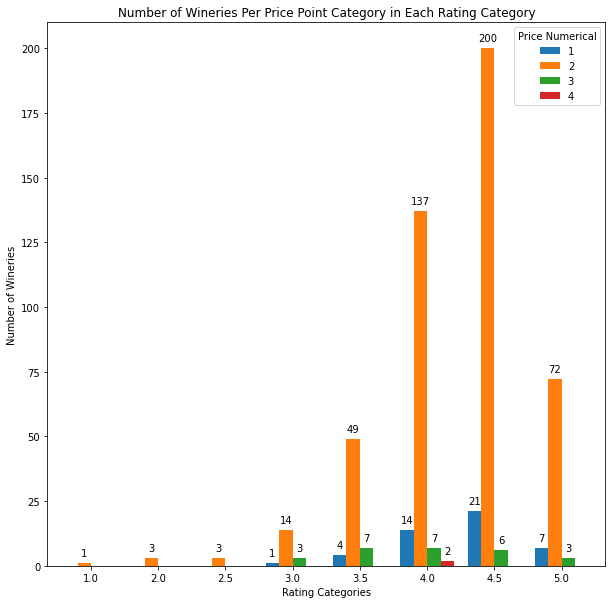

In [12]:
#creating a bar chart that shows the number of wineries within each rating tier by price point
rate_price= df[['Rating','Price Numerical']].groupby('Rating')['Price Numerical'].value_counts().unstack()
plt = rate_price.plot(kind='bar', rot=0, figsize=(10,10), width=.8)

#setting titles and axes labels
plt.set_title("Number of Wineries Per Price Point Category in Each Rating Category")
plt.set_xlabel("Rating Categories")
plt.set_ylabel("Number of Wineries")

#annotating values on the graph
for p in plt.patches:
    height = p.get_height()
    if height != 0:
        plt.annotate(p.get_height().astype(int), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Saving figure
plt.figure.savefig("Images/WineriesPerPricePointinRating.png")

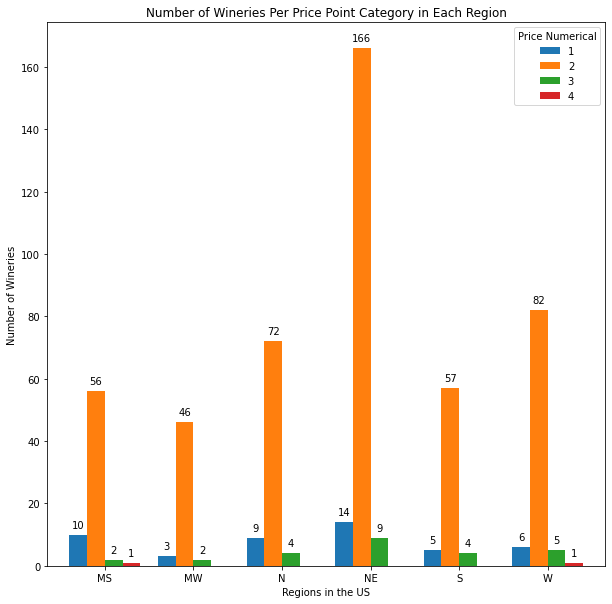

In [13]:
#creating a bar chart that shows the number of wineries per price point within each region
region_price = df[['Region','Price Numerical']].groupby('Region')['Price Numerical'].value_counts().unstack()
plt = region_price.plot(kind='bar', rot=0,figsize=(10,10), width=.8)

#setting titles and axes labels
plt.set_title("Number of Wineries Per Price Point Category in Each Region")
plt.set_xlabel("Regions in the US")
plt.set_ylabel("Number of Wineries")

#annotating values on the graph
for p in plt.patches:
    height = p.get_height()
    if height != 0:
        plt.annotate(p.get_height().astype(int), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Saving figure        
plt.figure.savefig("Images/RegionWineriesPerPricePoint.png")

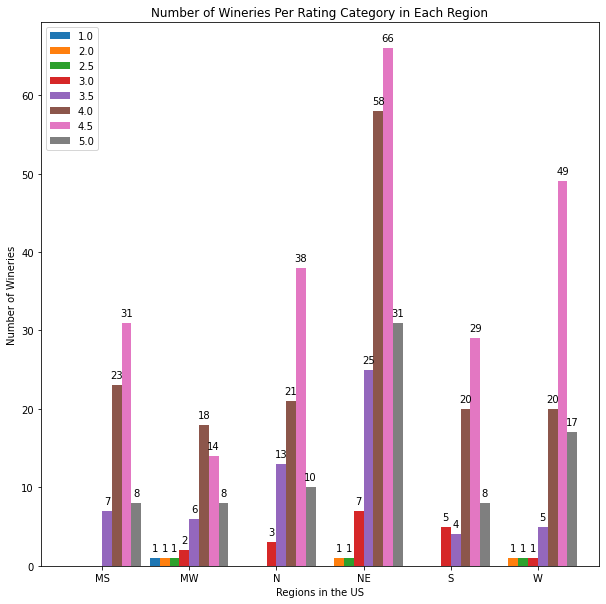

In [14]:
#creating a bar chart that shows the number of wineries per rating category within each region
region_rate = df[['Region','Rating']].groupby('Region')['Rating'].value_counts().unstack()
plt = region_rate.plot(kind='bar', rot=0, figsize=(10,10), width=.9)

#setting titles and axes labels
plt.set_title("Number of Wineries Per Rating Category in Each Region")
plt.set_xlabel("Regions in the US")
plt.set_ylabel("Number of Wineries")
plt.legend(loc=2)

#annotating values on the graph
for p in plt.patches:
    height = p.get_height()
    if height != 0:
        plt.annotate(p.get_height().astype(int), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Saving figure        
plt.figure.savefig("Images/RegionWineriesPerRating.png")

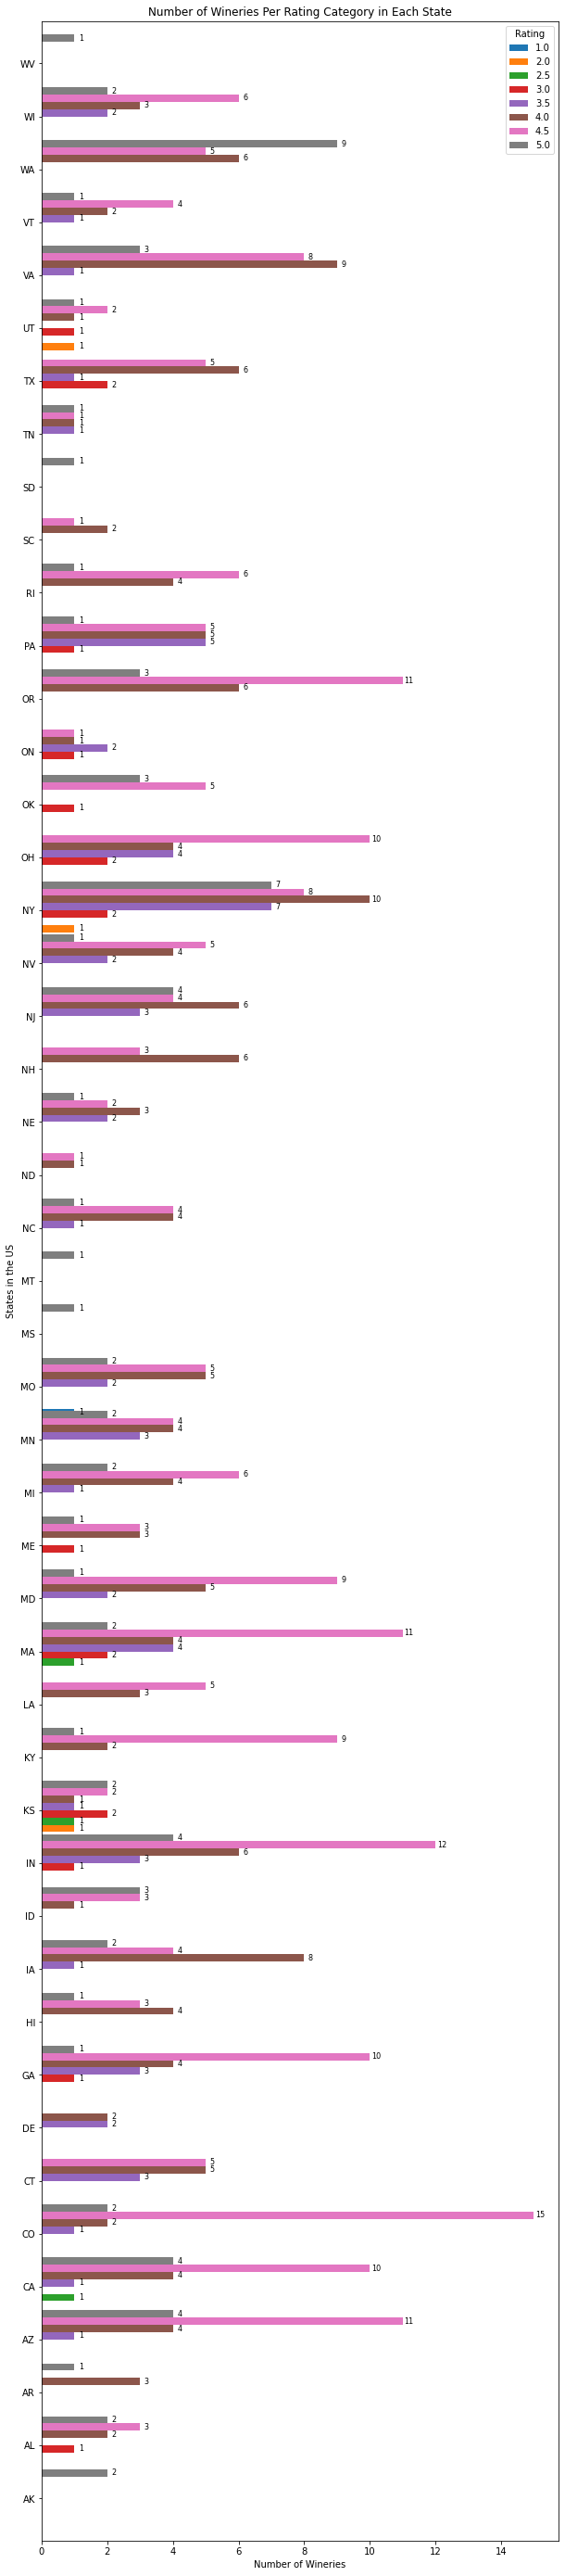

In [15]:
#creating a horizonatal bar graph of the number of wineries per each rating in each state
state_rate = df[['State','Rating']].groupby('State')['Rating'].value_counts().unstack()
plt = state_rate.plot(kind='barh',figsize=(10,50), width=1.1)

#setting titles and axes labels
plt.set_title("Number of Wineries Per Rating Category in Each State")
plt.set_ylabel("States in the US")
plt.set_xlabel("Number of Wineries")

#annotating values on the graph
for p in plt.patches:
    width = p.get_width()
    if width > 0:
        plt.text(.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             width.astype(int),
             ha='center', va='center', fontsize=8)

# Saving figure        
plt.figure.savefig("Images/StateWineriesPerRating.png")

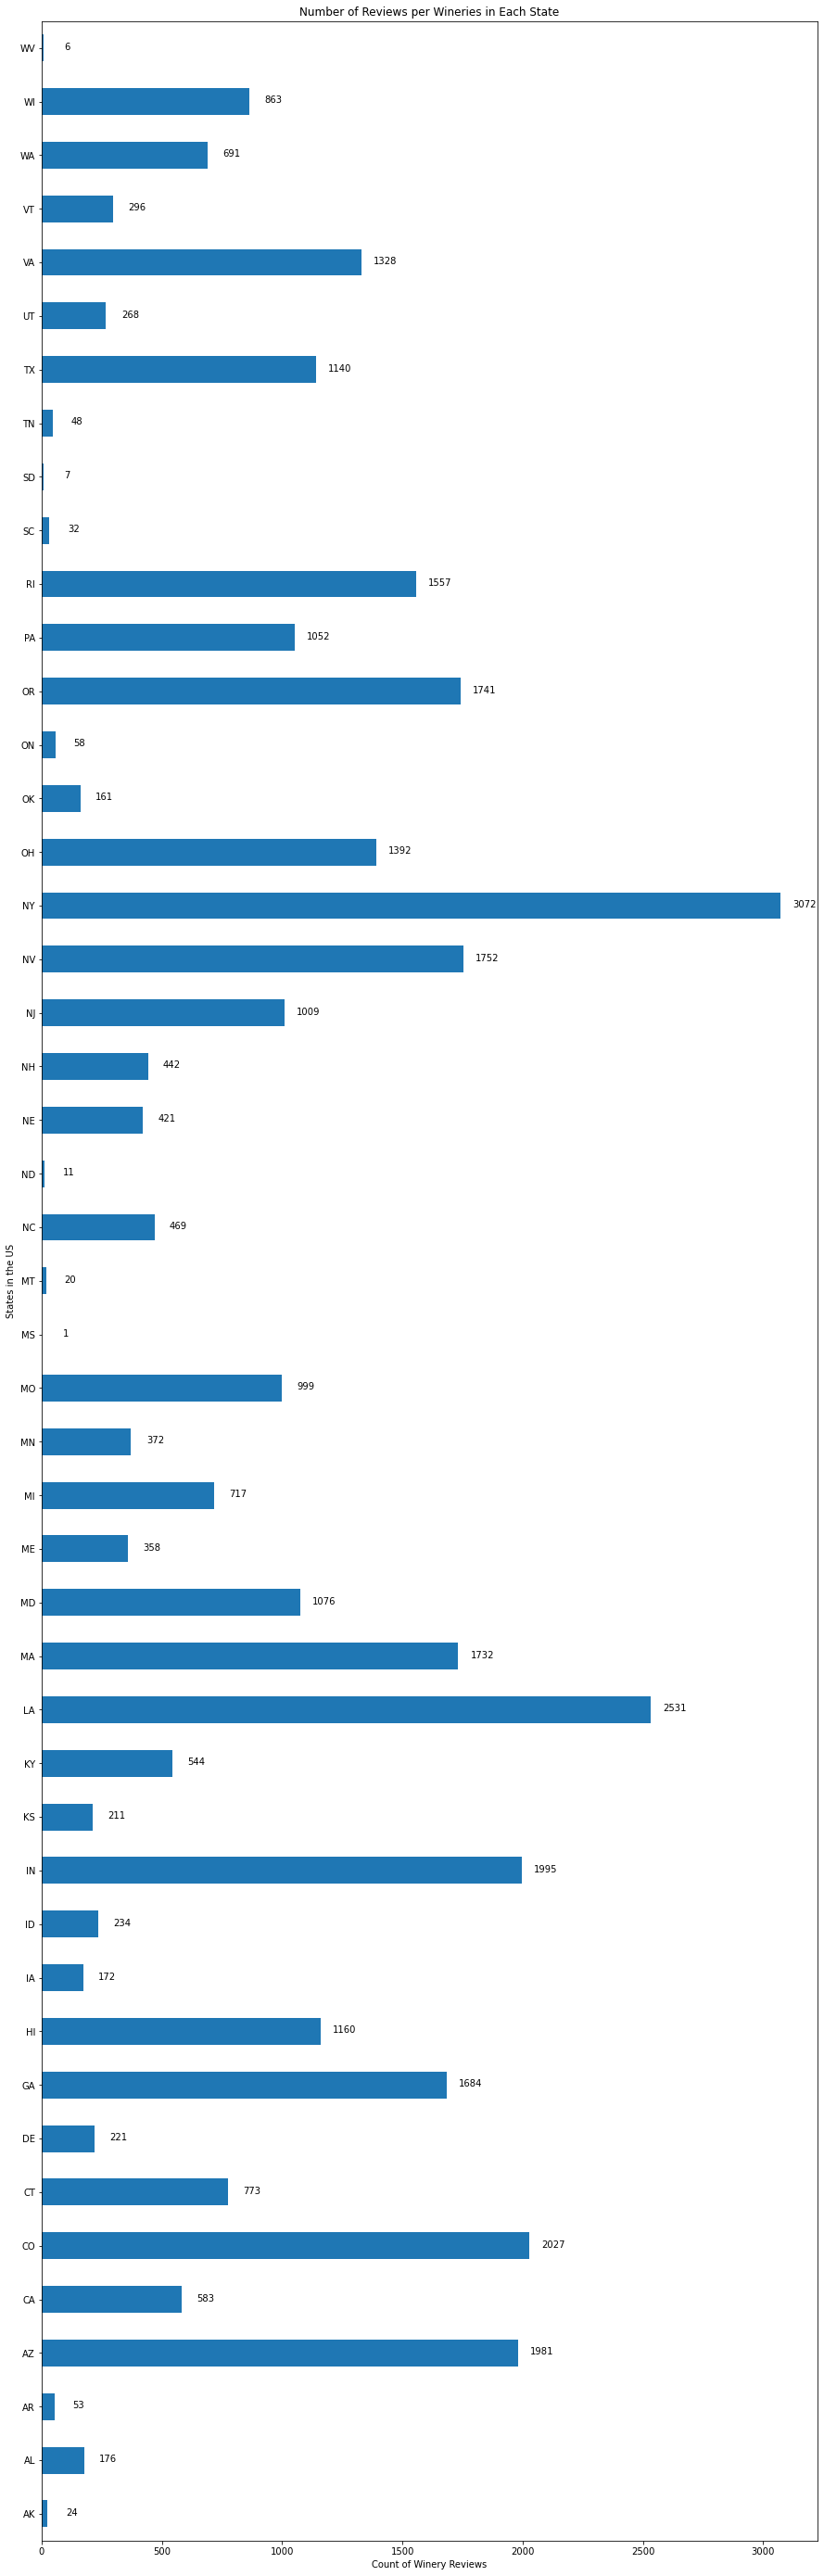

In [16]:
#creating a horizonatal bar graph of the number of wineries per each rating in each state
state_reviewcount = df[['State','Review Count']].groupby('State').sum().unstack().droplevel(0)
plt = state_reviewcount.plot(kind='barh',figsize=(15,50))

#setting titles and axes labels
plt.set_title("Number of Reviews per Wineries in Each State")
plt.set_ylabel("States in the US")
plt.set_xlabel("Count of Winery Reviews")



#annotating values on the graph
for p in plt.patches:
    width = p.get_width()
    if width > 0:
        plt.text(100+p.get_width(), (p.get_y()+0.55*p.get_height()),
             width,
             ha='center', va='center')

# Saving figure        
plt.figure.savefig("Images/ReviewCountPerState.png")

## Creating Heat Maps

In [18]:
# this will trim any rows that can not be plotted due to lack of information 
trim_df = pd.read_csv('df.csv')
rows_dropped= trim_df['State'].count() - trim_df['Lat'].count()
print(f"{rows_dropped} of {trim_df['State'].count()} row(s) will be dropped as no Latitude and Longitude was provided by the API.")
df = trim_df.dropna()
df

1 of 554 row(s) will be dropped as no Latitude and Longitude was provided by the API


,Unnamed: 0,Business Name,City,State,State Searched,Category,Review Count,Rating,Lat,Lng,Price,Price Numerical,Region
0,0,Corbin Farms Winery,Calera,AL,Alabama,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$,2,S
1,1,Cat-n-Bird Winery,Chelsea,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$,2,S
2,2,Ozan Vineyard & Winery,Calera,AL,Alabama,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$,2,S
3,3,Morgan Creek Vineyards,Harpersville,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$,2,S
4,4,Lewis Lakes Vineyards,Columbiana,AL,Alabama,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,33.201971,-86.613531,$$,2,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,Chiselled Grape Winery,Cedarburg,WI,Wisconsin,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$,2,N
550,550,Crush Wine Bar,Muskego,WI,Wisconsin,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$,2,N
551,551,Total Wine & More,Brookfield,WI,Wisconsin,"[{'alias': 'tobaccoshops', 'title': 'Tobacco S...",35,3.5,43.037835,-88.128296,$$,2,N
552,552,Fox & Fork,Rochester,WI,Wisconsin,"[{'alias': 'homedecor', 'title': 'Home Decor'}...",2,4.5,42.740948,-88.225754,$$$,3,N


In [25]:
#store latitude and longitude as the location and convert review to float to use a weight
location = df[['Lat', 'Lng']]
count = df['Review Count'].astype(float)
count_max = df['Review Count'].max().astype(float)


In [26]:
#Plotting heatmap for Ratings
#Defining map settings
figure_layout = {
    'width': '900px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

#Creating figure
fig = gmaps.figure(layout=figure_layout,zoom_level=4.5,center=(40, -97))

#Creating heat layer
heat_layer = gmaps.heatmap_layer(location, weights=count,
                                dissipating=False,max_intensity=count_max,
                                point_radius = .3)

#Adding heat layer
fig.add_layer(heat_layer)

#Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [27]:
#store latitude and longitude as the location and convert ratings to float to use a weight
location = df[['Lat', 'Lng']]
rate = df['Rating'].astype(float)

In [28]:
#Plotting heatmap for Ratings
#Defining map settings
figure_layout = {
    'width': '900px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

#Creating figure
fig = gmaps.figure(layout=figure_layout,zoom_level=4.5,center=(40, -97))

#Creating heat layer
heat_layer = gmaps.heatmap_layer(location, weights=rate,
                                dissipating=False,max_intensity=5,
                                point_radius = .3)

#Adding heat layer
fig.add_layer(heat_layer)

#Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [29]:
#store latitude and longitude as the location and convert price to float to use a weight
location = df[['Lat', 'Lng']]
price = df['Price Numerical'].astype(float)

In [30]:
#Plotting heatmap for Ratings
#Defining map settings
figure_layout = {
    'width': '900px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

#Creating figure
fig = gmaps.figure(layout=figure_layout,zoom_level=4.5,center=(40, -97))

#Creating heat layer
heat_layer = gmaps.heatmap_layer(location, weights=price,
                                dissipating=False,max_intensity=4,
                                point_radius = .3)

#Adding heat layer
fig.add_layer(heat_layer)

#Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…